In [974]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [975]:
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')
pd.set_option('display.max_columns', 50)

In [976]:
print(df.shape)
df.head()

(2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Clean Column Names #

In [977]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [978]:
df.columns = df.columns.str.strip().str.replace(" ","_").str.lower()

In [979]:
df.rename({'thinness__1-19_years' : 'thinness__10-19_years'}, axis = 1, inplace = True)

In [980]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

# Missing Values #

In [981]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__10-19_years               34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [982]:
# remove life_expectancy, since it it our target just remove those
df = df[df.life_expectancy.notnull()]

## Fill in GDP ##

In [983]:
# countries with missing values
df[df.gdp.isnull()].country.value_counts()

Congo                                                   16
Republic of Korea                                       16
Gambia                                                  16
Lao People's Democratic Republic                        16
Saint Vincent and the Grenadines                        16
Bahamas                                                 16
Kyrgyzstan                                              16
Côte d'Ivoire                                           16
Democratic Republic of the Congo                        16
Micronesia (Federated States of)                        16
Czechia                                                 16
Republic of Moldova                                     16
Bolivia (Plurinational State of)                        16
Yemen                                                   16
Venezuela (Bolivarian Republic of)                      16
Viet Nam                                                16
The former Yugoslav republic of Macedonia               

In [984]:
# read in gdp data from UN website 
gdp = pd.read_excel('Download-GDPPC-USD-countries.xlsx', header = 2)
gdp.head()

,CountryID,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4,Afghanistan,169.965223,167.562700,189.602842,208.419269,225.949589,258.118123,284.275252,383.024352,388.441431,442.777986,550.887159,636.524381,684.529292,669.682072,639.201474,598.835602
1,8,Albania,1114.514374,1254.715333,1393.347835,1783.649274,2311.523352,2608.543874,2904.347050,3519.225201,4289.954520,4051.132168,4045.744651,4401.730703,4227.650566,4399.863881,4567.281443,3939.413126
2,12,Algeria,1761.048998,1750.527274,1783.676549,2103.382141,2610.182686,3113.094277,3478.709639,3950.513625,4923.630825,3883.270236,4480.786786,5455.843408,5592.223152,5499.587619,5493.054962,4177.884983
3,20,Andorra,21936.513259,22228.647579,24742.619011,32775.178366,38505.180605,41281.031203,43745.378087,48579.786989,47786.775564,43336.180582,39733.967950,41103.236749,38393.295393,40628.969874,42298.666090,36041.256851
4,24,Angola,744.556413,705.108899,872.494358,982.960862,1255.563695,1902.420255,2599.567368,3121.993897,4080.943884,3122.782079,3587.883041,4615.470485,5100.098190,5254.883253,5408.409568,4166.979626


In [985]:
# subset data set by years
subset = ['Country', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
          2009, 2010, 2011, 2012, 2013, 2014, 2015]
gdp = gdp[subset]

In [986]:
# return dataframe only with countries below
countries = ['Bahamas', 'Bolivia (Plurinational State of)', 'Congo', "Côte d'Ivoire", 
             'Czechia', 'D.P.R. of Korea', 'D.R. of the Congo', 'Egypt', 'Eritrea', 'Gambia', 
             'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan', "Lao People's DR", 'Libya', 
             'Micronesia (FS of)', 'North Macedonia', 'Papua New Guinea', 'Republic of Korea', 
             'Republic of Moldova', 'Saint Lucia', 'Sao Tome and Principe', 'Slovakia', 
             'Somalia', 'South Sudan', 'St. Vincent and the Grenadines','Syrian Arab Republic',
             'U.R. of Tanzania: Mainland', 'United Kingdom', 'United States', 'Venezuela (Bolivarian Republic of)', 
             'Viet Nam', 'Yemen']

gdp = gdp[gdp.Country.isin(countries)]

In [987]:
# original names of countries
original = ['Bahamas','Bolivia (Plurinational State of)','Congo', "Côte d'Ivoire",
            'Czechia', "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Egypt',
            'Eritrea', 'Gambia', 'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan', 
            "Lao People's Democratic Republic", 'Libya', 'Micronesia (Federated States of)', 
            'The former Yugoslav republic of Macedonia', 'Papua New Guinea', 'Republic of Korea',
            'Republic of Moldova','Saint Lucia','Sao Tome and Principe', 'Slovakia','Somalia', 'South Sudan',
            'Saint Vincent and the Grenadines', 'Syrian Arab Republic','United Republic of Tanzania', 
            'United Kingdom of Great Britain and Northern Ireland', 'United States of America',
            'Venezuela (Bolivarian Republic of)','Viet Nam','Yemen']

In [988]:
# make dictionary from countries and original
rename = {}
for x, y in zip(countries, original):
    rename[x] = y

In [989]:
# set index to country and transpose so that countries are now columns
gdp = gdp.set_index('Country').T

In [990]:
# rename country names in gdp dataframe to match names in orinal dataframe
gdp.rename(rename, axis = 1, inplace = True)

In [991]:
# reverse the transpose, to return country to index
gdp = gdp.T

In [992]:
# stack gdp so that it is multi-index data frame Country > Year, then reset index so dataframe matches origal
gdp = pd.DataFrame(gdp.stack()).reset_index()

In [993]:
# rename columns to match with original dataframe
gdp.rename({'Country':'country', 'level_1':'year', 0: 'gdp'}, axis = 1, inplace = True)
gdp.head()

,country,year,gdp
0,Bahamas,2000,27097.711465
1,Bahamas,2001,27486.137639
2,Bahamas,2002,28866.931028
3,Bahamas,2003,28327.302805
4,Bahamas,2004,28395.956023


In [994]:
# merge both data sets together
df = df.merge(gdp, how = 'left', on = ['country', 'year'])

In [995]:
# replace nan values in original gdp with values in new gdp column
df['gdp_x'] = np.where(df['gdp_x'].isnull(), df['gdp_y'], df['gdp_x'])

In [996]:
# drop added column and rename original column back to original name
df.drop('gdp_y', axis = 1, inplace = True)
df.rename({'gdp_x':'gdp'}, axis = 1, inplace = True)

In [997]:
# south sudan is still missing values so just take the median of filled data to fill NaNs
s_sudan_gdp = df.groupby('country').median().loc[['South Sudan']].gdp[0]
df.loc[2408:2415, 'gdp'] = s_sudan_gdp

In [998]:
df.gdp.isnull().sum()

0

## Fill in Population ##

In [999]:
# create list of countries that have null values for population
og_nopop = list(df[df.population.isnull()].country.unique())

In [1000]:
# read in UN population data
pops = pd.read_csv('UN_pop_data.csv')
pops.head()

,Country or Area,Year(s),Variant,Value
0,Antigua and Barbuda,2015,Medium,93.566
1,Antigua and Barbuda,2015,High,93.566
2,Antigua and Barbuda,2015,Low,93.566
3,Antigua and Barbuda,2015,Constant fertility,93.566
4,Antigua and Barbuda,2015,Instant replacement,93.566


In [1001]:
# clean up pops data set
pops.rename({'Country or Area': 'country', 'Year(s)': 'year', 'Value' : 'population'}, 
            axis = 1, inplace = True)

In [1002]:
# population is the same across all Variant levels, so only need one variant level to get population per year
pops[pops.country == 'United Arab Emirates'].groupby('year').describe()

population                                                        \
          count      mean           std       min       25%       50%   
year                                                                    
2000        9.0  3134.062  0.000000e+00  3134.062  3134.062  3134.062   
2001        9.0  3302.719  4.823324e-13  3302.719  3302.719  3302.719   
2002        9.0  3478.777  9.646648e-13  3478.777  3478.777  3478.777   
2003        9.0  3711.932  4.823324e-13  3711.932  3711.932  3711.932   
2004        9.0  4068.570  4.823324e-13  4068.570  4068.570  4068.570   
2005        9.0  4588.225  9.646648e-13  4588.225  4588.225  4588.225   
2006        9.0  5300.174  0.000000e+00  5300.174  5300.174  5300.174   
2007        9.0  6168.838  9.646648e-13  6168.838  6168.838  6168.838   
2008        9.0  7089.487  9.646648e-13  7089.487  7089.487  7089.487   
2009        9.0  7917.372  1.929330e-12  7917.372  7917.372  7917.372   
2010        9.0  8549.988  1.929330e-12  8549.988  8549.988  8549.988   
2011        9.0  8946.777  0.000000e+00  8946.777  8946.777  8946.777   
2012        9.0  9141.596  0.000000e+00  9141.596  9141.596  9141.596   
2013        9.0  9197.910  1.929330e-12  9197.910  9197.910  9197.910   
2014        9.0  9214.175  1.929330e-12  9214.175  9214.175  9214.175   
2015        9.0  9262.900  0.000000e+00  9262.900  9262.900  9262.900   

                          
           75%       max  
year                      
2000  3134.062  3134.062  
2001  3302.719  3302.719  
2002  3478.777  3478.777  
2003  3711.932  3711.932  
2004  4068.570  4068.570  
2005  4588.225  4588.225  
2006  5300.174  5300.174  
2007  6168.838  6168.838  
2008  7089.487  7089.487  
2009  7917.372  7917.372  
2010  8549.988  8549.988  
2011  8946.777  8946.777  
2012  9141.596  9141.596  
2013  9197.910  9197.910  
2014  9214.175  9214.175  
2015  9262.900  9262.900

In [1003]:
# make dataframe smaller by just returning one value of Variant, then drop variant column
pops = pops[pops.Variant == 'High']
pops.drop(['Variant'], axis = 1, inplace = True)

In [1004]:
pops = pops.set_index('country').T

In [1005]:
pops.rename({"Dem. People's Republic of Korea":"Democratic People's Republic of Korea",
            'Micronesia (Fed. States of)':'Micronesia (Federated States of)',
            'North Macedonia':'The former Yugoslav republic of Macedonia',
            'United Kingdom':'United Kingdom of Great Britain and Northern Ireland'},
           axis = 1, inplace = True)

In [1006]:
# undo transpose and reset index
pops = pops.T.reset_index()

In [1007]:
# turn year to integer dtype
pops.year = pops.year.astype('int')

In [1008]:
# scale population data appropriately
pops['population1000'] = pops.population * 1000

In [1009]:
# drop original population column and rename population1000 column
pops.drop('population', axis = 1, inplace = True)
pops.rename({'population1000':'population'}, axis = 1, inplace = True)

In [1010]:
# merge pops column with original dataframe
df = df.merge(pops, how = 'left', on = ['country', 'year'])

In [1011]:
# replace nan values in original gdp with values in new gdp column
df['population_x'] = np.where(df['population_x'].isnull(), df['population_y'], 
                              df['population_x'])

# drop added column and rename original column back to original name
df.drop('population_y', axis = 1, inplace = True)
df.rename({'population_x':'population'}, axis = 1, inplace = True)

In [1012]:
df.population.isnull().sum()

0

## Fill income_composition and Schooling ##

In [1013]:
list(df[df.income_composition_of_resources.isnull()].country.unique())

["Côte d'Ivoire",
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Republic of Korea',
 'Republic of Moldova',
 'Somalia',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America']

In [1014]:
list(df[df.schooling.isnull()].country.unique())

["Côte d'Ivoire",
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Republic of Korea',
 'Republic of Moldova',
 'Somalia',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America']

In [1015]:
# edit schooling data for merging with original df
schooling = pd.read_csv('schooling.csv', encoding = "ISO-8859-1")
schooling.set_index('Country', inplace = True)
schooling = schooling.T
schooling.rename({"Cte d'Ivoire":"Côte d'Ivoire"}, axis = 1, inplace = True)
schooling = schooling.T
schooling = pd.DataFrame(schooling.stack()).reset_index()
schooling.rename({'Country': 'country','level_1' : 'year', 0:'schooling'}, axis = 1, inplace = True)

In [1016]:
# edit hdi data for merging with original df
hdi = pd.read_csv('HDI.csv', encoding = "ISO-8859-1")
hdi.set_index('Country', inplace = True)
hdi = hdi.T
hdi.rename({"Cte d'Ivoire":"Côte d'Ivoire"}, axis = 1, inplace = True)
hdi = hdi.T
hdi = pd.DataFrame(hdi.stack()).reset_index()
hdi.rename({'Country': 'country','level_1' : 'year', 0:'income_composition_of_resources'}, axis = 1, inplace = True)

In [1017]:
# change dtype of year to int
schooling.year = schooling.year.astype(int)
hdi.year = hdi.year.astype(int)

In [1018]:
# remove north korea value since it is only one
schooling = schooling[schooling.country != "Democratic People's Republic of Korea"]

In [1019]:
# merge schooling and hdi df together
hdi = hdi.merge(schooling, how = 'left', on = ['country', 'year'])
# merge replacement df onto original
df = df.merge(hdi, how = 'left', on = ['country', 'year'])

In [1021]:
# replace nan values in original income_comp with values in new income_comp column
df['income_composition_of_resources_x'] = np.where(df['income_composition_of_resources_x'].isnull(), 
                                                   df['income_composition_of_resources_y'], 
                                                   df['income_composition_of_resources_x'])

# drop added column and rename original column back to original name
df.drop('income_composition_of_resources_y', axis = 1, inplace = True)
df.rename({'income_composition_of_resources_x':'income_composition_of_resources'}, axis = 1, inplace = True)

# replace nan values in original schooling with values in new schooling column
df['schooling_x'] = np.where(df['schooling_x'].isnull(), df['schooling_y'], 
                             df['schooling_x'])

# drop added column and rename original column back to original name
df.drop('schooling_y', axis = 1, inplace = True)
df.rename({'schooling_x':'schooling'}, axis = 1, inplace = True)

In [1041]:
# only missing data left is for North Korea and Somalia, we'll impute the median income_comp and schooling of
# developing countries
inccomp_median = dict(df[df.status == 'Developing'].groupby('year')['income_composition_of_resources'].median())
to_replace = df[(df['income_composition_of_resources'].isna())].year.map(inccomp_median).index
values = df[(df['income_composition_of_resources'].isna())].year.map(inccomp_median)
df.loc[to_replace, 'income_composition_of_resources'] = values

In [1043]:
scholing_median = dict(df[df.status == 'Developing'].groupby('year')['schooling'].median())
to_replace = df[(df['schooling'].isna())].year.map(scholing_median).index
values = df[(df['schooling'].isna())].year.map(scholing_median)
df.loc[to_replace, 'schooling'] = values

In [1044]:
df.income_composition_of_resources.isnull().sum(), df.schooling.isnull().sum()

(0, 0)

In [1046]:
# export df
df.to_csv('cleaned_nulls.csv')

# EDA #

In [141]:
x = df.groupby('status').mean()['life_expectancy']
x

status
Developed     79.197852
Developing    67.111465
Name: life_expectancy, dtype: float64

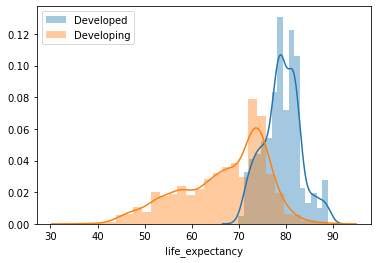

In [144]:
sns.distplot(df[df.status == 'Developed']['life_expectancy'])
sns.distplot(df[df.status == 'Developing']['life_expectancy'])
plt.legend(['Developed', 'Developing'])

In [145]:
developed = df[df.status == 'Developed']['life_expectancy']
developing = df[df.status == 'Developing']['life_expectancy']

In [146]:
len(developed)

512

In [147]:
stats.ttest_ind(developed, developing[:513])

Ttest_indResult(statistic=25.380449653665224, pvalue=1.2934822076813624e-110)